$\textbf{BAR GRAPH}$


| LABEL | COUNT |
|-------|-------|
| D     | 1     |
| D     | 1     |
| D     | 0     |
| D     | 1     |
| F     | 1     |
| F     | 1     |
| F     | 0     |
| F     | 0     |
| I     | 1     |
| N     | 1     |
| N     | 1     |
| N     | 0     |
| S     | 1     |
| S     | 0     |
| S     | 1     |
| S     | 1     |
| S     | 1     |
| S     | 0     |
| S     | 0     |
| S     | 0     |
| S     | 1     |
| S     | 0     |

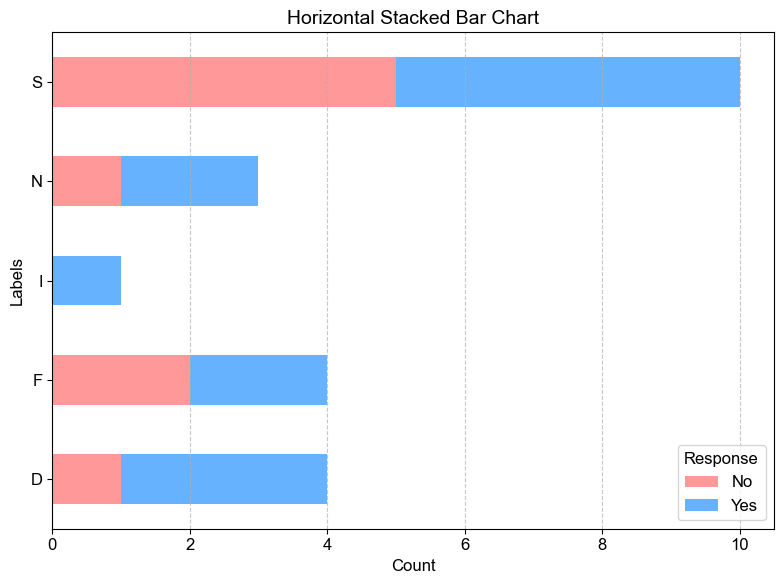

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    "LABEL": ["D", "D", "D", "D", "F", "F", "F", "F", "I", "N", "N", "N", 
              "S", "S", "S", "S", "S", "S", "S", "S", "S", "S"],
    "COUNT": ["YES", "YES", "NO", "YES", "YES", "YES", "NO", "NO", "YES", 
              "YES", "YES", "NO", "YES", "NO", "YES", "YES", "YES", "NO", 
              "NO", "NO", "YES", "NO"]
}
df = pd.DataFrame(data)


summary = df.groupby(["LABEL", "COUNT"]).size().unstack(fill_value=0)


plt.rcParams["font.family"] = "Arial" 
plt.rcParams["font.size"] = 12  


summary.plot(
    kind="barh", 
    stacked=True,  
    color=["#FF9999", "#66B2FF"], 
    figsize=(8, 6) 
)


plt.title("Horizontal Stacked Bar Chart", fontsize=14)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Labels", fontsize=12)
plt.legend(title="Response", labels=["No", "Yes"])
plt.grid(axis="x", linestyle="--", alpha=0.7)


plt.tight_layout()
plt.show()


$\textbf{SANKEY DIAGRAM}$


| LABEL | PS | OMP | CNP | NRP | NMCCC | PEC | NCDM | RGS | Reg | Aca | Oth |
|-------|----|-----|-----|-----|-------|-----|------|-----|-----|-----|-----|
| S     | 3  | 4   | 1   | 1   | 0     | 0   | 1    | 1   | 2   | 7   | 1   |
| F     | 0  | 1   | 2   | 1   | 1     | 0   | 0    | 1   | 2   | 2   | 0   |
| D     | 1  | 1   | 2   | 0   | 0     | 0   | 1    | 1   | 1   | 3   | 1   |
| N     | 1  | 1   | 1   | 1   | 0     | 1   | 1    | 0   | 2   | 2   | 1   |
| I     | 0  | 1   | 0   | 0   | 0     | 0   | 0    | 0   | 0   | 1   | 0   |

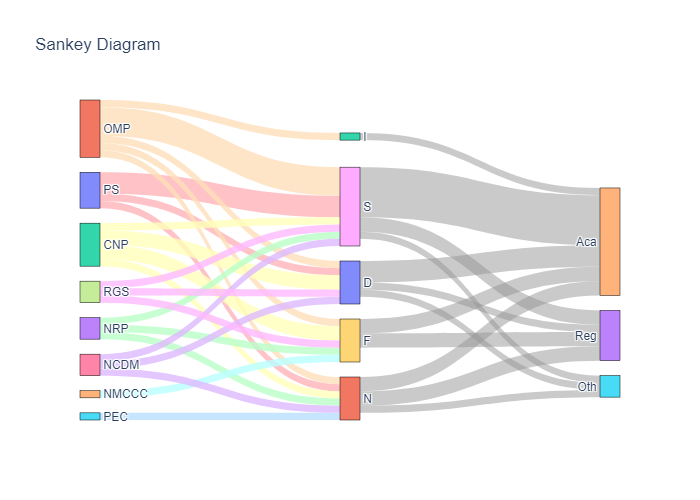

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from IPython.display import display  # For displaying images in Jupyter Notebook
from PIL import Image  # For opening and displaying the saved image

# Load the CSV file
df = pd.read_csv('d:/2nd year/Data analytics/assignment/assignment 2/sankey_assignment.csv')

# Define source and target labels
sources = ['PS', 'OMP', 'CNP', 'NRP', 'NMCCC', 'PEC', 'NCDM', 'RGS']
labels = df['LABEL'].tolist()
targets = ['Reg', 'Aca', 'Oth']

# Lists to store Sankey data
source_indices = []
target_indices = []
values = []
colors = []

# Define pastel colors for the links
pastel_colors = [
    'rgba(255, 179, 186, 0.8)',  
    'rgba(255, 223, 186, 0.8)',  
    'rgba(255, 255, 186, 0.8)',  
    'rgba(186, 255, 201, 0.8)',  
    'rgba(186, 255, 255, 0.8)',  
    'rgba(186, 223, 255, 0.8)', 
    'rgba(223, 186, 255, 0.8)',  
    'rgba(255, 186, 255, 0.8)'   
]


for source in sources:
    for i, label in enumerate(labels):
        value = df[source][i] 
        if value > 0:
            source_indices.append(sources.index(source)) 
            target_indices.append(len(sources) + i)  
            values.append(value)  
            colors.append(pastel_colors[sources.index(source)])  


for i, label in enumerate(labels):
    for target in targets:
        value = df[target][i] 
        if value > 0:
            source_indices.append(len(sources) + i)  
            target_indices.append(len(sources) + len(labels) + targets.index(target))  
            values.append(value) 
            colors.append("rgba(150, 150, 150, 0.5)")  


node_labels = sources + labels + targets


fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=node_labels
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=values,
        color=colors
    )
)])


fig.update_layout(
    title_text="Sankey Diagram",
    font=dict(
        family="Arial",
        size=12
    )
)

fig.write_image("sankey_diagram.png")




img = Image.open("sankey_diagram.png")
display(img)


fig.show()


$\textbf{NETWORK GRAPH}$


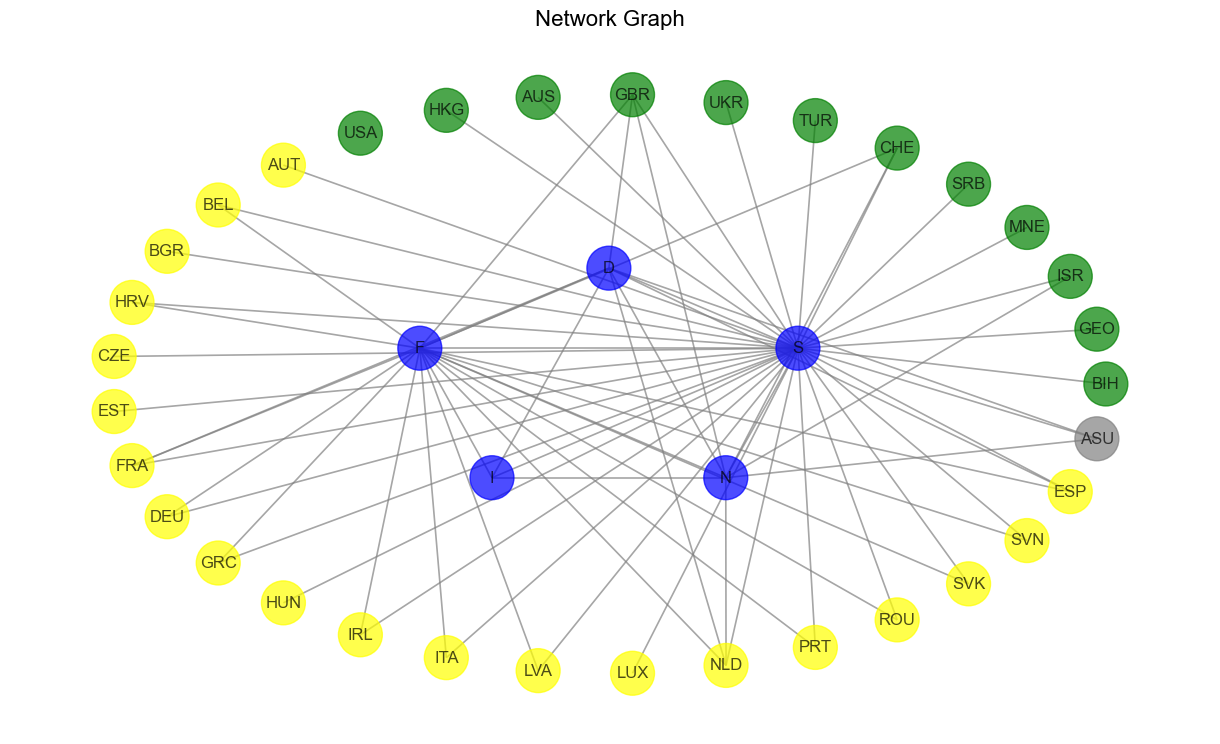

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


G = nx.Graph()

blue_nodes = ['D', 'F', 'I', 'N', 'S']
green_nodes = ['BIH', 'GEO', 'ISR', 'MNE', 'SRB', 'CHE', 'TUR', 'UKR', 'GBR', 'AUS', 'HKG', 'USA']
yellow_nodes = ['AUT', 'BEL', 'BGR', 'HRV', 'CZE', 'EST', 'FRA', 'DEU', 'GRC', 'HUN', 'IRL', 'ITA', 'LVA', 'LUX', 'NLD', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP']
grey_nodes = ['ASU']


for node in blue_nodes:
    G.add_node(node, color="blue")
for node in green_nodes:
    G.add_node(node, color="green")
for node in yellow_nodes:
    G.add_node(node, color="yellow")
for node in grey_nodes:
    G.add_node(node, color="grey")


edges = [
    ('D', 'N'), ('D', 'F'), ('D', 'I'), ('D', 'S'), ('D', 'FRA'),
    ('D', 'NLD'), ('D', 'ESP'), ('D', 'GBR'), ('D', 'ASU'),
    ('F', 'N'), ('F', 'D'), ('F', 'I'), ('F', 'S'), ('F', 'BEL'),
    ('F', 'HRV'), ('F', 'FRA'), ('F', 'DEU'), ('F', 'GRC'), ('F', 'IRL'),
    ('F', 'ITA'), ('F', 'LVA'), ('F', 'NLD'), ('F', 'PRT'), ('F', 'ROU'),
    ('F', 'SVK'), ('F', 'SVN'), ('F', 'ESP'), ('F', 'CHE'), ('F', 'GBR'),
    ('N', 'D'), ('N', 'F'), ('N', 'I'), ('N', 'S'), ('N', 'ISR'),
    ('N', 'NLD'), ('N', 'CHE'), ('N', 'GBR'), ('N', 'ASU'),
    ('S', 'D'), ('S', 'F'), ('S', 'I'), ('S', 'AUT'), ('S', 'BEL'),
    ('S', 'BIH'), ('S', 'BGR'), ('S', 'HRV'), ('S', 'CZE'), ('S', 'EST'),
    ('S', 'FRA'), ('S', 'GEO'), ('S', 'DEU'), ('S', 'GRC'), ('S', 'HUN'),
    ('S', 'IRL'), ('S', 'ISR'), ('S', 'ITA'), ('S', 'LVA'), ('S', 'LUX'),
    ('S', 'MNE'), ('S', 'NLD'), ('S', 'PRT'), ('S', 'ROU'), ('S', 'SRB'),
    ('S', 'SVK'), ('S', 'SVN'), ('S', 'ESP'), ('S', 'CHE'), ('S', 'TUR'),
    ('S', 'UKR'), ('S', 'GBR'), ('S', 'AUS'), ('S', 'HKG'), ('S', 'ASU')
]
G.add_edges_from(edges)


pos = {
    'D': (0.0, 1.0), 'F': (-0.951, 0.309), 'I': (-0.588, -0.809),
    'N': (0.588, -0.809), 'S': (0.951, 0.309),
}


outer_radius = 2.5
num_outer_positions = len(green_nodes) + len(yellow_nodes) + len(grey_nodes)
angle_increment = 2 * np.pi / num_outer_positions


outer_labels = green_nodes + yellow_nodes + grey_nodes

for i, label in enumerate(outer_labels):
    angle = i * angle_increment
    x = outer_radius * np.cos(angle)
    y = outer_radius * np.sin(angle)
    pos[label] = (x, y)

node_colors = [G.nodes[node].get('color', 'black') for node in G.nodes]


plt.figure(figsize=(12, 7))
nx.draw(
    G, pos, with_labels=True,
    node_color=node_colors,
    edge_color="gray", alpha=0.7,
    width=1.2, node_size=1000,
    font_size=12, font_color="black", font_family="Arial"
)
plt.title("Network Graph", fontsize=16, fontfamily="Arial")
plt.show()
